## Predicting Heart Disease using Machine Learning
This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease.


### 1 Problem Definition
we're going to be use a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not. 

### 2 Data
we've downloaded it in a formatted way(.csv) from Kaggle 

### 3 Evaluation
The evaluation metric is something you might define at the start of a project.
Since machine learning is very experimental, you might say something like,

##### If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

it is provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

### 4 Features
Features are different parts of the data. During this step, we want to explore the feature data as much as can 

### Preparing the tools
* Pandas for data analysis. https://pandas.pydata.org/
* NumPy for numerical operations. https://numpy.org/
* Matplotlib/seaborn for plotting or data visualization. https://matplotlib.org/
* Scikit-Learn for machine learning modelling and evaluation. https://scikit-learn.org/stable/

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Magic Function - we want our plots to appear in the notebook 
%matplotlib inline

# Models for classifcations 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
dataframe = pd.read_csv("heart-disease.csv")

### Data Exploration (Exploratary Data Analysis or EDA)

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

* What question(s) are you trying to solve (or prove wrong)?
* What kind of data do you have and how do you treat different types?
* What’s missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [3]:
dataframe.head() # heart-disease.csv data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#shape (rows * columns) 
dataframe.shape

(303, 14)

In [5]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
# target column value count
# value_counts() allows you to show how many times each of the values of a categorical column appear.
dataframe.target.value_counts() 

1    165
0    138
Name: target, dtype: int64

In [7]:
dataframe["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

* Value 1 denotes with Heart Disease 
* Value 0 denotes without Heart Patient
* Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, 
meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

If you'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [8]:
dataframe.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

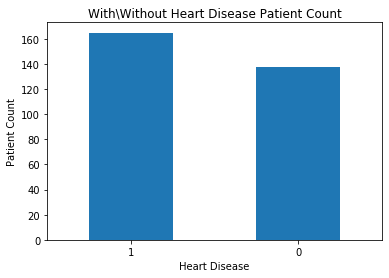

In [9]:
# plot the value count in bar graph 
dataframe.target.value_counts().plot(kind="bar")
plt.xlabel("Heart Disease")
plt.ylabel("Patient Count")
plt.title("With\Without Heart Disease Patient Count")
plt.xticks(rotation=0);

In [10]:
# f.info() shows a quick insight to the number of missing values you have and what type of data your working with.

# In our case, there are no missing values and all of our columns are numerical in nature.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease freuency according to the gender 

In [12]:
dataframe.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(dataframe.target,dataframe.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.
##### Sex
* 0 - Female
* 1 - Male
##### Target
* 0 - without heart disease
* 1 - with heart disease 

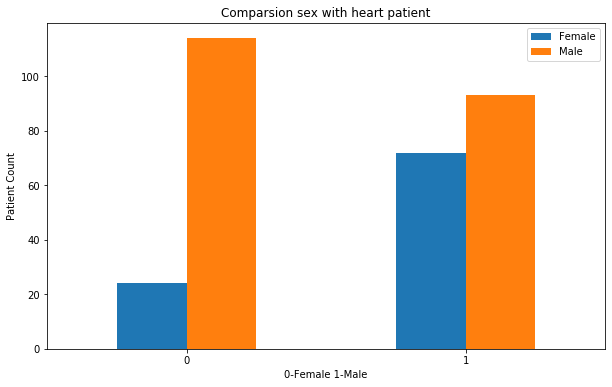

In [14]:
### Visualize this cross tab in bar graph 
pd.crosstab(dataframe.target, dataframe.sex).plot(kind="bar", figsize=(10,6))
plt.ylabel("Patient Count")
plt.xlabel("0-Female 1-Male")
plt.xticks(rotation=0)
plt.legend(["Female","Male"])
plt.title("Comparsion sex with heart patient");

### Age vs Max Heart rate for Heart Disease
Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

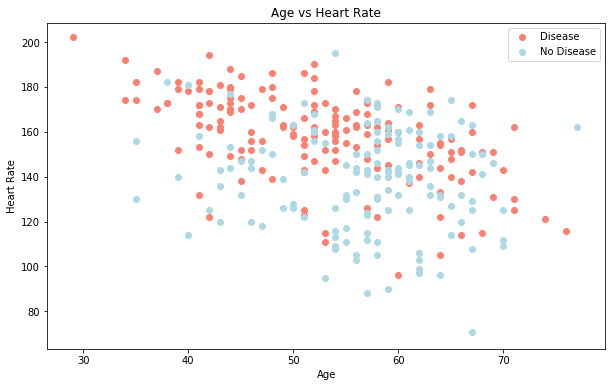

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(dataframe.age[dataframe.target==1], dataframe.thalach[dataframe.target==1], color='salmon')
plt.scatter(dataframe.age[dataframe.target==0], dataframe.thalach[dataframe.target==0], color='lightblue')
plt.title("Age vs Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"]);

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

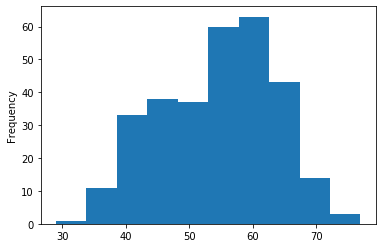

In [16]:
# Histogram is great way to check distribution of the variable
dataframe.age.plot(kind="hist");

We can see it's a normal distribution but slightly swaying to the right, which reflects in the scatter plot above.

### Heart Disease Frequency per Chest Pain Type
Let's try another feature variable. this time, cp(chest pain)

In [17]:
pd.crosstab(dataframe.cp,dataframe.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


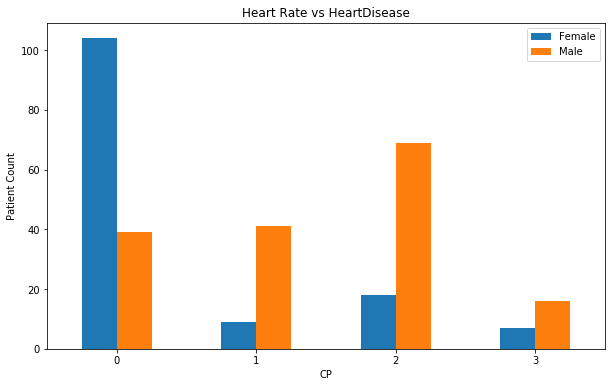

In [18]:
pd.crosstab(dataframe.cp,dataframe.target).plot(kind="bar", figsize=(10,6))
plt.legend(["Female","Male"])
plt.xlabel("CP")
plt.ylabel("Patient Count")
plt.title("Heart Rate vs HeartDisease")
plt.xticks(rotation=0);

### cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems even some medical professionals are confused by the term.

##### Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.



### Correlation between independent feature variables

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [19]:
dataframe.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


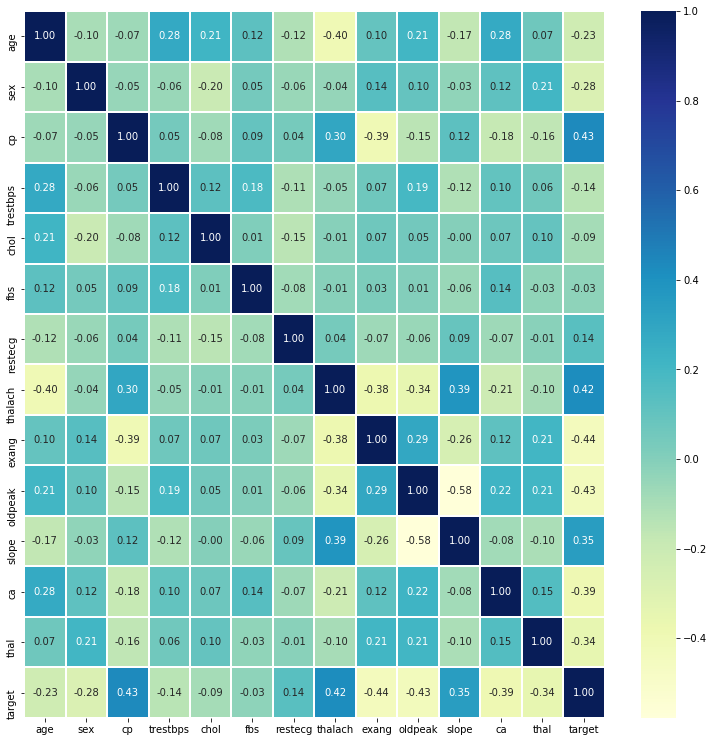

In [20]:
# let's make it little prettier
corr_matrix = dataframe.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, 
            annot=True,    ## display value in the cell
            linewidths=1,  ## width between each cell
            fmt=".2f",     ## display value format 
            cmap="YlGnBu"); 


Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

We want to do a quick check on this data : Missing values(dataframe.info()), Outliers, Distribution of columns (dataframe.plot.hist())

## 5 Modelling
now, we will try to use machine learing model to predict our target variable based on the 13 independent variable of patient

In [21]:
# Data
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# we are going to split the target value from the rest 
X = dataframe.drop("target", axis=1)

y = dataframe.target

In [23]:
# feature
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
# target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
## Split Train and test data 
#as we all know that test data should not be present in train data. we need to split the data into two dataframe (80% and 20%)

X_train, X_test, y_train, y_test = train_test_split(X,   # Feature Variable
                                                   y,    # Target Variable
                                                   test_size=0.2) # Data Split Size 

In [26]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3


In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

### Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()

### Why these?
If we look at the Scikit-Learn algorithm cheat sheet https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, we can see we're working on a classification problem and these are the algorithms it suggests

In [28]:
# create a function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    models: a dict different scikit-learn machine learning models
    X_train: training data
    X_test: test data 
    y_train: labels associated with training data
    y_test: labels associated with test data 
    """
    # Random seed for reproducible results 
    np.random.seed(42)
    # fit the model to the data
    models.fit(X_train, y_train)
    # Evaluate the model with test data
    model_score = models.score(X_test, y_test)
    # return the model score
    return model_score

In [29]:
models = {"KNN":KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}
models_score = {}
for model_name, model in models.items():
    models_score[model_name] = fit_and_score(model,X_train,X_test,y_train,y_test)
    
models_score

C:\Users\user\Desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.9016393442622951}

let's compare them visually

In [30]:
model_compare = pd.DataFrame(models_score, index=["Accuracy"])
model_compare

,KNN,Logistic Regression,Random Forest
Accuracy,0.655738,0.885246,0.901639


Text(0.5, 1.0, 'Classification Model Accuracy')

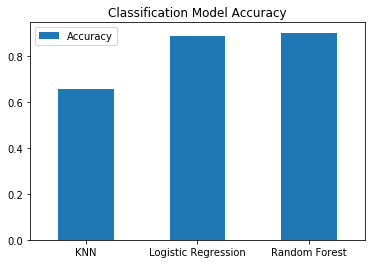

In [31]:
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Classification Model Accuracy")

from above accuracy score, we have found that the Logistic Regression model perfrom the best 

### Hyperparameter tuning and cross-validation 

* Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Tune KNeighborsClassifier (K-Nearest Neighbours or KNN) by Hand 

Hypertuning Parameters
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Each model has some default hyper parameter values but we need to find out which parameter value suits better for our model by changing some other values .


In [32]:
#to find out the default parameters  
for model in models.values():
    print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_stat

In [33]:
# we are going to change KNeighborsClassifier model parameter n_neighbors (1 - 20)

n_neighbors_range = range(1,20)
n_neighbors_range

range(1, 20)

In [34]:
neighbours = []
KNeighbors_Hypertune_Score = []
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    neighbours.append(i)
    KNeighbors_Hypertune_Score.append(model.score(X_test,y_test))


In [35]:
KNeighbors_Hypertune_Score

[0.5737704918032787,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327]

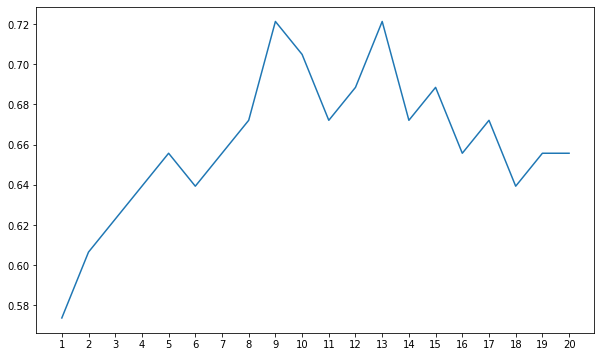

In [36]:
plt.figure(figsize=(10,6))
plt.plot(neighbours, KNeighbors_Hypertune_Score)
plt.xticks(np.arange(1,21,1));

from above graph, n_neighbors value 4, 6 seems best
but, KNeighborsClassifier model did not perform well then Logistic Regression model. 
because of this, we will discard KNeighborsClassifier Model and going to work on other two models.

### Tuning models with the randomizedsearchCV
Reference Material 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [37]:

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [38]:
# setup random seed for reproduced the result 
np.random.seed(42)
    
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

C:\Users\user\Desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(X_test,y_test)

0.9016393442622951

Let's do the same for RandomForestClassifier()

In [41]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=30,
                           verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [42]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [43]:
rs_rf.score(X_test,y_test)

0.9016393442622951

### Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In short:

RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
GridSearchCV - tries every single combination of hyperparameters and saves the best.
Let's see it in action.

In [44]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [45]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

## Evaluating a classifcation model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

* ROC curve and AUC score - plot_roc_curve() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve
* Confusion matrix - confusion_matrix() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* Classification report - classification_report() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
* Precision - precision_score() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* Recall - recall_score() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* F1-score - f1_score() - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling predict() on a trained model and passing it the data you'd like to predict on.

In [48]:
# Make prediction on finialzied model with test data 
y_preds = gs_log_reg.predict(X_test)
y_preds # Predicted TargetValue

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [52]:
np.array(y_test) # Actual Target Value

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

##### To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function plot_roc_curve which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the plot_roc_curve function we can see it takes (estimator, X, y) as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.


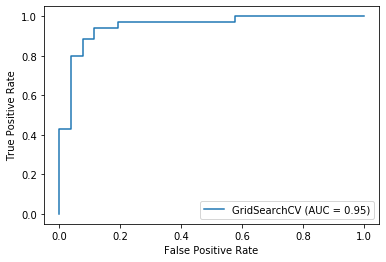

In [54]:
#import ROC Curve function from metrics module
from sklearn.metrics import roc_auc_score

#plot ROC curve and calculate AUC metric 
plot_roc_curve(gs_log_reg,
               X_test,
               y_test)

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

### Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

sklearn will help us to do confusion metrix with the funcation confusion_matrix()
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [55]:
print(confusion_matrix(y_test,y_preds))

[[22  4]
 [ 2 33]]


let's create a function which uses Seaborn's heatmap(). for doing so,

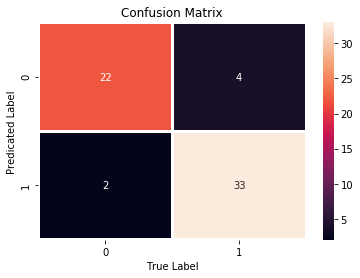

In [62]:
# import seaborn 
import seaborn as sns 

def plot_conf_mat(y_test, y_preds):
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                linewidths=2)
    plt.xlabel("True Label")
    plt.ylabel("Predicated Label")
    plt.title("Confusion Matrix")
    
plot_conf_mat(y_test, y_preds)



This looks pretty good :) :)

### Classification Report 
A classification report will also give us information of the precision and recall of our model for each class.

In [65]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



What's going on here?

Let's get a refresh.

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

We've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

In [66]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [68]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hypermeters 
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

we've got an instantiated classifier, let's find some cross-validated metrics

In [69]:
# Cross-validated accuracy score 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

In [70]:
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

there are 5 metrics value so, i will find a mean value below

In [73]:
cv_acc = cv_acc.mean()
cv_acc

0.8479781420765027

In [75]:
# Cross-validated Precision Score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                      scoring='precision'))
cv_precision

0.8215873015873015

In [77]:
# cross validate recall score 

cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring='recall'))
cv_recall

0.9272727272727274

In [79]:
# cross validated f1 score 

cv_f1 = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring='f1'))
cv_f1

0.8705403543192143

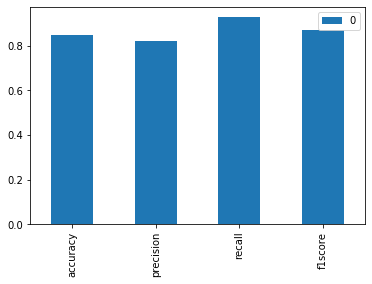

In [91]:
# Visualize all cross validated scoring

scoring = pd.DataFrame({"accuracy":cv_acc,
         "precision":cv_precision,
         "recall":cv_recall,
         "f1score":cv_f1}, index=[0]);

scoring.T.plot(kind="bar")

### Another important evaluation techniques is feature importance 

- "which features contributing most to the outcomes of the model / for our model"

Trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

we can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

since, we're using LogisticRegression. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

In [93]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
clf.coef_[0]   # each feature contribution 

array([ 0.00236082, -0.80937325,  0.59906925, -0.01078594, -0.0038409 ,
        0.17928378,  0.33491924,  0.02838478, -0.63440238, -0.45886243,
        0.35221311, -0.58846931, -0.7067234 ])

In [105]:
columns_coef = dict(zip(dataframe.columns, list(clf.coef_[0])))
columns_coef

{'age': 0.0023608201282517833,
 'sex': -0.8093732496499647,
 'cp': 0.5990692513953157,
 'trestbps': -0.010785944648664133,
 'chol': -0.003840904133388711,
 'fbs': 0.17928377967700604,
 'restecg': 0.3349192433731535,
 'thalach': 0.028384784317047853,
 'exang': -0.6344023834598139,
 'oldpeak': -0.45886242538273314,
 'slope': 0.35221311353532175,
 'ca': -0.5884693119840279,
 'thal': -0.7067234008181481}

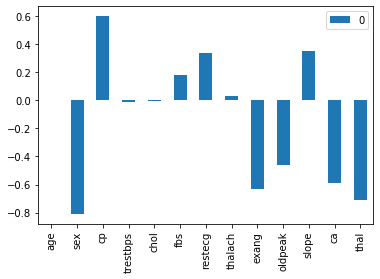

In [111]:
# visualize above data
pd.DataFrame(columns_coef, index=[0]).T.plot(kind="bar")


You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

let's see some of the examples 

In [112]:
pd.crosstab(dataframe["sex"],dataframe["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [113]:
pd.crosstab(dataframe["slope"],dataframe["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6 Experiment

Now, we've completed all the metrics.

Remember we defined one in step 3.

#### If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

### Atlast, come to END sesssion

still, we can improve this model to do more accuracy in below ways,

* We can train the model with more data?

* we could also try some other Model/ Improve our finalized model with different hyper tune param.? If you're working with structured data, you might want to look into CatBoost or XGBoost.



